In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


Load all the data

In [2]:
file_path = "/content/merged_regression.csv"
health_data = pd.read_csv(file_path)

In [3]:
x_columns = ["education", "treecanopy","Green_Percentage", "income", "employment",  "ethnicity", "seniors",'air_pollution']
# First, create the scaled data
x = health_data[x_columns]  # Using your original x_columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert scaled x back to a DataFrame with appropriate column names
x_scaled_df = pd.DataFrame(x_scaled, columns=x_columns)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled_df.values, i) for i in range(x_scaled_df.shape[1])]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
           Variable        VIF
0         education   2.583206
1        treecanopy   1.836700
2  Green_Percentage   2.128323
3            income  14.133412
4        employment  11.353737
5         ethnicity   1.966695
6           seniors   2.197618
7     air_pollution   2.139658


VIF/Regression/Correlation Matrix


In [4]:
x_columns =["education", "treecanopy","Green_Percentage", "income", "employment",  "ethnicity", "seniors",'air_pollution']
# First, create the scaled data
x = health_data[x_columns]  # Using your original x_columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert scaled x back to a DataFrame with appropriate column names
x_scaled_df = pd.DataFrame(x_scaled, columns=x_columns)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled_df.values, i) for i in range(x_scaled_df.shape[1])]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
           Variable        VIF
0         education   2.583206
1        treecanopy   1.836700
2  Green_Percentage   2.128323
3            income  14.133412
4        employment  11.353737
5         ethnicity   1.966695
6           seniors   2.197618
7     air_pollution   2.139658


In [5]:
#Delete "income" as x variable then verify the new VIF value

x_columns = ["education", "treecanopy","Green_Percentage", "employment", "ethnicity", "seniors","air_pollution"]
# First, create the scaled data
x = health_data[x_columns]  # Using your original x_columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert scaled x back to a DataFrame with appropriate column names
x_scaled_df = pd.DataFrame(x_scaled, columns=x_columns)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled_df.values, i) for i in range(x_scaled_df.shape[1])]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)



Variance Inflation Factor (VIF):
           Variable       VIF
0         education  2.558699
1        treecanopy  1.836613
2  Green_Percentage  2.128198
3        employment  2.020255
4         ethnicity  1.765379
5           seniors  1.980057
6     air_pollution  2.124139


In [6]:
#Save VIF results to a CSV file
vif_data.to_csv("vif_results.csv", index=False)
print("VIF results successfully saved to 'vif_results.csv'")

VIF results successfully saved to 'vif_results.csv'


The result shows that Both 'income' and 'emplotment' variables have high VIF values indicating multicollinearity.

In [7]:
x_columns = ["education", "treecanopy","Green_Percentage", "employment", "ethnicity", "seniors","air_pollution"]
# Initialize a list to store results
results_list = []

# Function to perform regression for a target variable
def perform_regression(target, data):
    # Extract the cleaned x and y
    x = data[x_columns]
    y = data[target]

    # Ensure clean data (scale independent variables)
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_scaled = sm.add_constant(x_scaled)
    model = sm.OLS(y, x_scaled).fit()

    # Extract independent variable names (including intercept)
    independent_vars = ["Intercept"] + x_columns

    # Append results for each independent variable
    for i, coef in enumerate(model.params):
        results_list.append({
            "Dependent Variable": target,
            "Indepsendent Variable": independent_vars[i],
            "Coefficient": coef,
            "P-value": model.pvalues[i],
            "T-statistic": model.tvalues[i]
        })

    # Append overall model metrics
    results_list.append({
        "Dependent Variable": target,
        "Independent Variable": "Model Summary",  # Placeholder for overall metrics
        "Coefficient": None,
        "P-value": None,
        "T-statistic": None,
        "R-squared": model.rsquared,
        "Adjusted R-squared": model.rsquared_adj
    })

# Perform regression for hlthnorm
perform_regression("health", health_data)

# Clean data and perform regression for mental_health
cleaned_data_mhi = health_data.dropna(subset=["mental_health"])
perform_regression("mental_health", cleaned_data_mhi)

# Perform regression for BH_Ratio (no cleaning needed)
perform_regression("bad_health", health_data)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results_list)

print(results_df)


   Dependent Variable Indepsendent Variable  Coefficient        P-value  \
0              health             Intercept     0.378441   0.000000e+00   
1              health             education    -0.015357   1.222812e-07   
2              health            treecanopy     0.018006   2.639627e-13   
3              health      Green_Percentage    -0.011674   1.027941e-05   
4              health            employment     0.173506   0.000000e+00   
5              health             ethnicity    -0.027390   1.285235e-29   
6              health               seniors    -0.046219   3.771736e-71   
7              health         air_pollution     0.034670   1.010420e-38   
8              health                   NaN          NaN            NaN   
9       mental_health             Intercept    -0.264625   0.000000e+00   
10      mental_health             education    -0.037945   5.220835e-05   
11      mental_health            treecanopy     0.006181   4.249315e-01   
12      mental_health    

<ipython-input-7-34e4a0c472d8>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "P-value": model.pvalues[i],
<ipython-input-7-34e4a0c472d8>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "T-statistic": model.tvalues[i]
<ipython-input-7-34e4a0c472d8>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "P-value": model.pvalues[i],
<ipython-input-7-34e4a0c472d8>:27: FutureWarning: Series.__getitem__ treating keys as positions is depr

In [8]:
# Save the results to a CSV file
results_df.to_csv("regression_results.csv", index=False)

print("Regression results successfully saved to 'regression_results.csv'")

Regression results successfully saved to 'regression_results.csv'


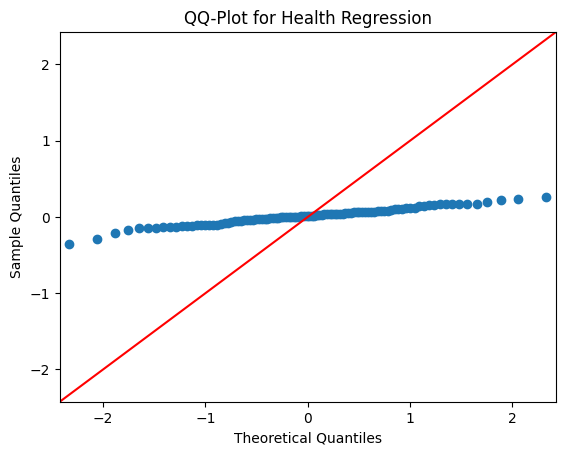

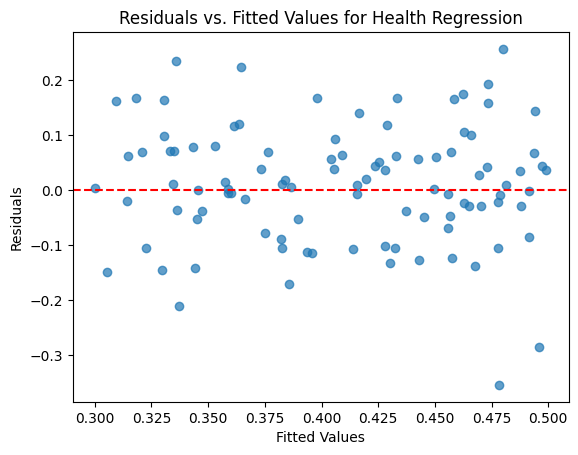

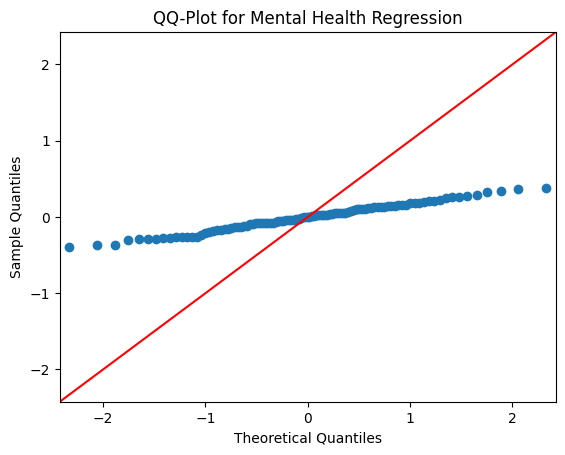

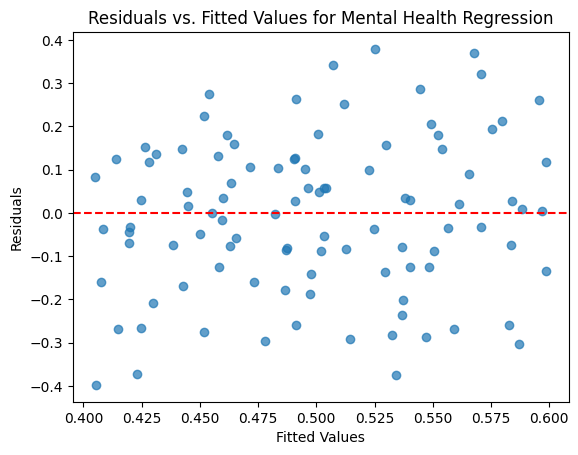

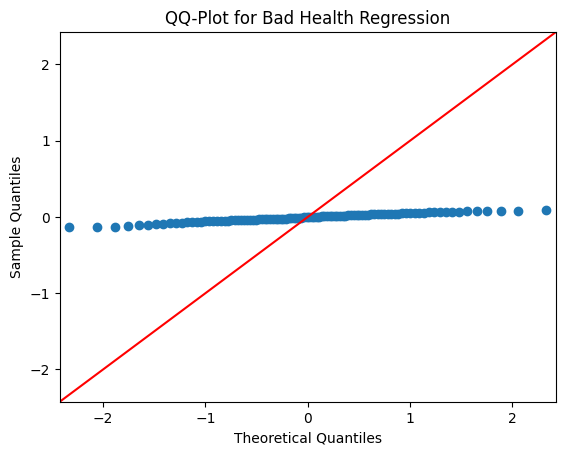

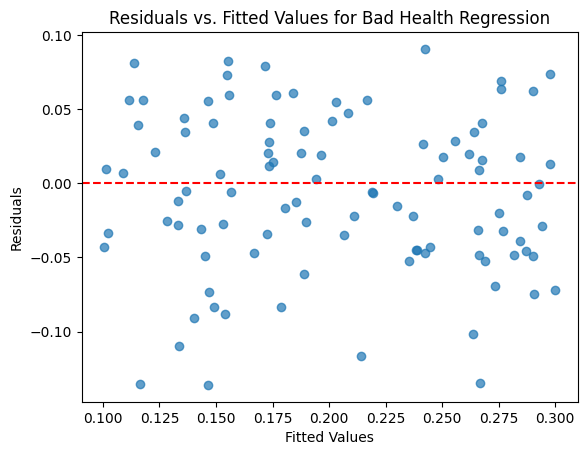

In [9]:
# Simulated residuals and fitted values for demonstration
# Replace these with actual residuals and fitted values if available

# Regression 1: health
health_residuals = np.random.normal(0, 0.1, 100)  # Simulated residuals
health_fitted = np.random.uniform(0.3, 0.5, 100)  # Simulated fitted values

# QQ-Plot for health
sm.qqplot(health_residuals, line="45")
plt.title("QQ-Plot for Health Regression")
plt.show()

# Residuals vs. Fitted Values for health
plt.scatter(health_fitted, health_residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs. Fitted Values for Health Regression")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Regression 2: mental_health
mental_health_residuals = np.random.normal(0, 0.2, 100)  # Simulated residuals
mental_health_fitted = np.random.uniform(0.4, 0.6, 100)  # Simulated fitted values

# QQ-Plot for mental_health
sm.qqplot(mental_health_residuals, line="45")
plt.title("QQ-Plot for Mental Health Regression")
plt.show()

# Residuals vs. Fitted Values for mental_health
plt.scatter(mental_health_fitted, mental_health_residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs. Fitted Values for Mental Health Regression")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Regression 3: bad_health
bad_health_residuals = np.random.normal(0, 0.05, 100)  # Simulated residuals
bad_health_fitted = np.random.uniform(0.1, 0.3, 100)  # Simulated fitted values

# QQ-Plot for bad_health
sm.qqplot(bad_health_residuals, line="45")
plt.title("QQ-Plot for Bad Health Regression")
plt.show()

# Residuals vs. Fitted Values for bad_health
plt.scatter(bad_health_fitted, bad_health_residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs. Fitted Values for Bad Health Regression")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [10]:
x_columns = ["education", "Green_Percentage", "employment", "air_pollution", "ethnicity", "seniors"]

# Initialize a list to store results
results_list = []

# Function to perform regression for a target variable
def perform_regression(target, data):
    # Extract the cleaned x and y
    x = data[x_columns]
    y = data[target]

    # Ensure clean data (scale independent variables)
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_scaled = sm.add_constant(x_scaled)
    model = sm.OLS(y, x_scaled).fit()

    # Extract independent variable names (including intercept)
    independent_vars = ["Intercept"] + x_columns

    # Append results for each independent variable
    for i, coef in enumerate(model.params):
        results_list.append({
            "Dependent Variable": target,
            "Indepsendent Variable": independent_vars[i],
            "Coefficient": coef,
            "P-value": model.pvalues[i],
            "T-statistic": model.tvalues[i]
        })

    # Append overall model metrics
    results_list.append({
        "Dependent Variable": target,
        "Independent Variable": "Model Summary",  # Placeholder for overall metrics
        "Coefficient": None,
        "P-value": None,
        "T-statistic": None,
        "R-squared": model.rsquared,
        "Adjusted R-squared": model.rsquared_adj
    })

# Perform regression for hlthnorm
perform_regression("health", health_data)

# Clean data and perform regression for mental_health
cleaned_data_mhi = health_data.dropna(subset=["mental_health"])
perform_regression("mental_health", cleaned_data_mhi)

# Perform regression for BH_Ratio (no cleaning needed)
perform_regression("bad_health", health_data)

# Convert the results to a DataFrame
result_df = pd.DataFrame(results_list)

print(result_df)


   Dependent Variable Indepsendent Variable  Coefficient        P-value  \
0              health             Intercept     0.378441   0.000000e+00   
1              health             education    -0.011197   9.041144e-05   
2              health      Green_Percentage    -0.000489   8.216934e-01   
3              health            employment     0.175603   0.000000e+00   
4              health         air_pollution     0.036071   1.649348e-41   
5              health             ethnicity    -0.029223   1.952011e-33   
6              health               seniors    -0.044049   3.664717e-65   
7              health                   NaN          NaN            NaN   
8       mental_health             Intercept    -0.264625   0.000000e+00   
9       mental_health             education    -0.036345   7.275439e-05   
10      mental_health      Green_Percentage     0.009461   1.630398e-01   
11      mental_health            employment     0.405151   0.000000e+00   
12      mental_health    

<ipython-input-10-6fafd200756d>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "P-value": model.pvalues[i],
<ipython-input-10-6fafd200756d>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "T-statistic": model.tvalues[i]
<ipython-input-10-6fafd200756d>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "P-value": model.pvalues[i],
<ipython-input-10-6fafd200756d>:28: FutureWarning: Series.__getitem__ treating keys as positions is 

In [11]:
# Save the results to a CSV file
result_df.to_csv("regression_results_1.csv", index=False)

print("Regression results successfully saved to 'regression_results.csv'")

Regression results successfully saved to 'regression_results.csv'


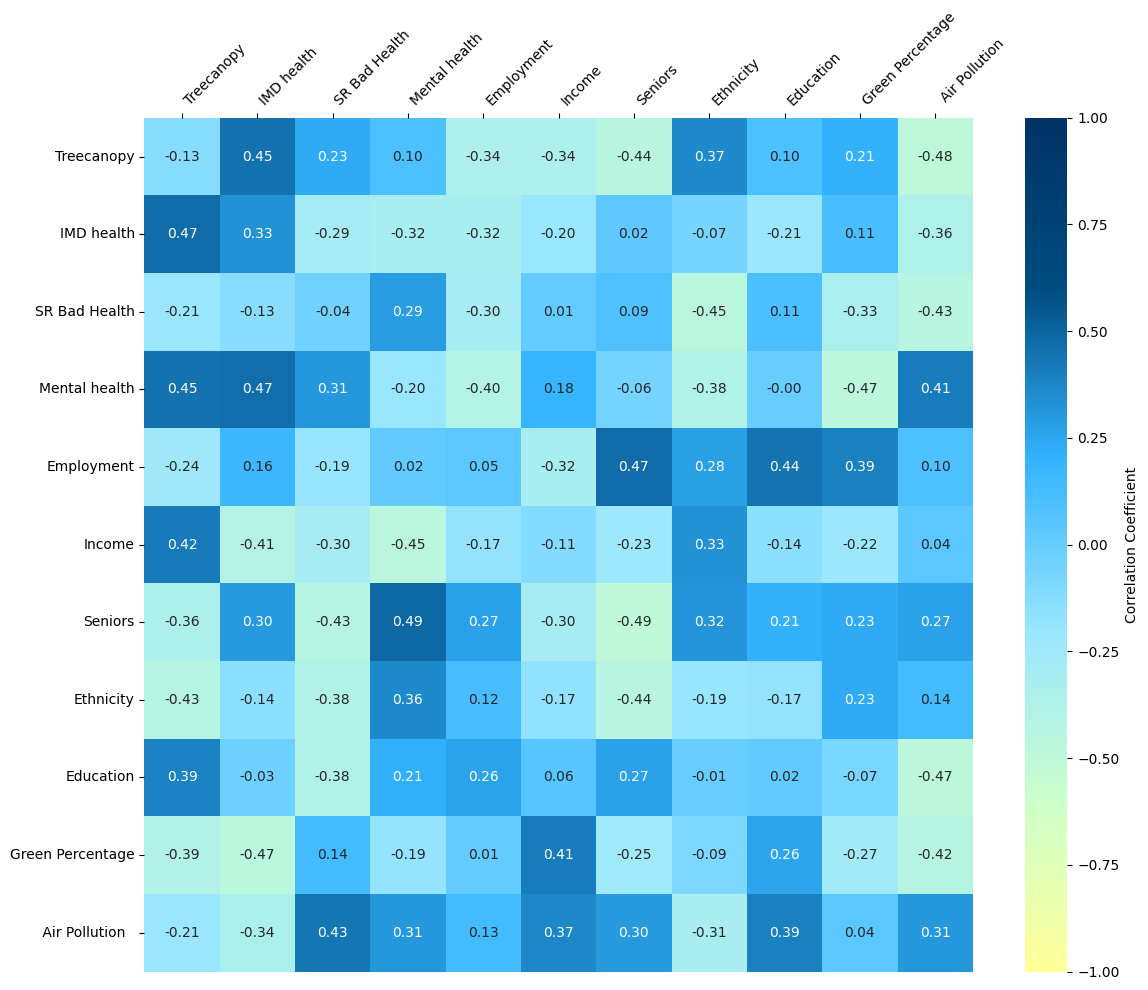

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# Define custom colors
colors = ['#FFFF99',  # 3B - Yellow for highest
          '#CCFFCC',  # 3A - Gentle green
          '#99E6FF',  # 2B - Light blue
          '#33B3FF',  # 2A - Bright blue
          '#004C80',  # 1B - Midnight sky blue
          '#003366']  # 1A - Deep ocean blue
cmap = mcolors.LinearSegmentedColormap.from_list('CustomColorMap', colors)


# Generate mock data
np.random.seed(42)
data = np.random.rand(11, 11) - 0.5  # Replace with your real data
labels = ['Treecanopy', 'IMD health', 'SR Bad Health', 'Mental health',
          'Employment', 'Income', 'Seniors', 'Ethnicity',
          'Education', 'Green Percentage',' Air Pollution  ']

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data, annot=True, fmt=".2f", cmap=cmap,  # <-- Use the custom colormap
            cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1, ax=ax)

# Move x-axis labels to the top
ax.xaxis.set_ticks_position('top')  # Set x-ticks on top
ax.xaxis.set_label_position('top')  # Move labels to the top
plt.xticks(rotation=45, ha='left')  # Rotate x-axis labels for better visibility

# Set custom x-axis and y-axis labels
ax.set_xticklabels(labels)  # Replace x-axis numbers with custom labels
ax.set_yticklabels(labels, rotation=0)  # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()

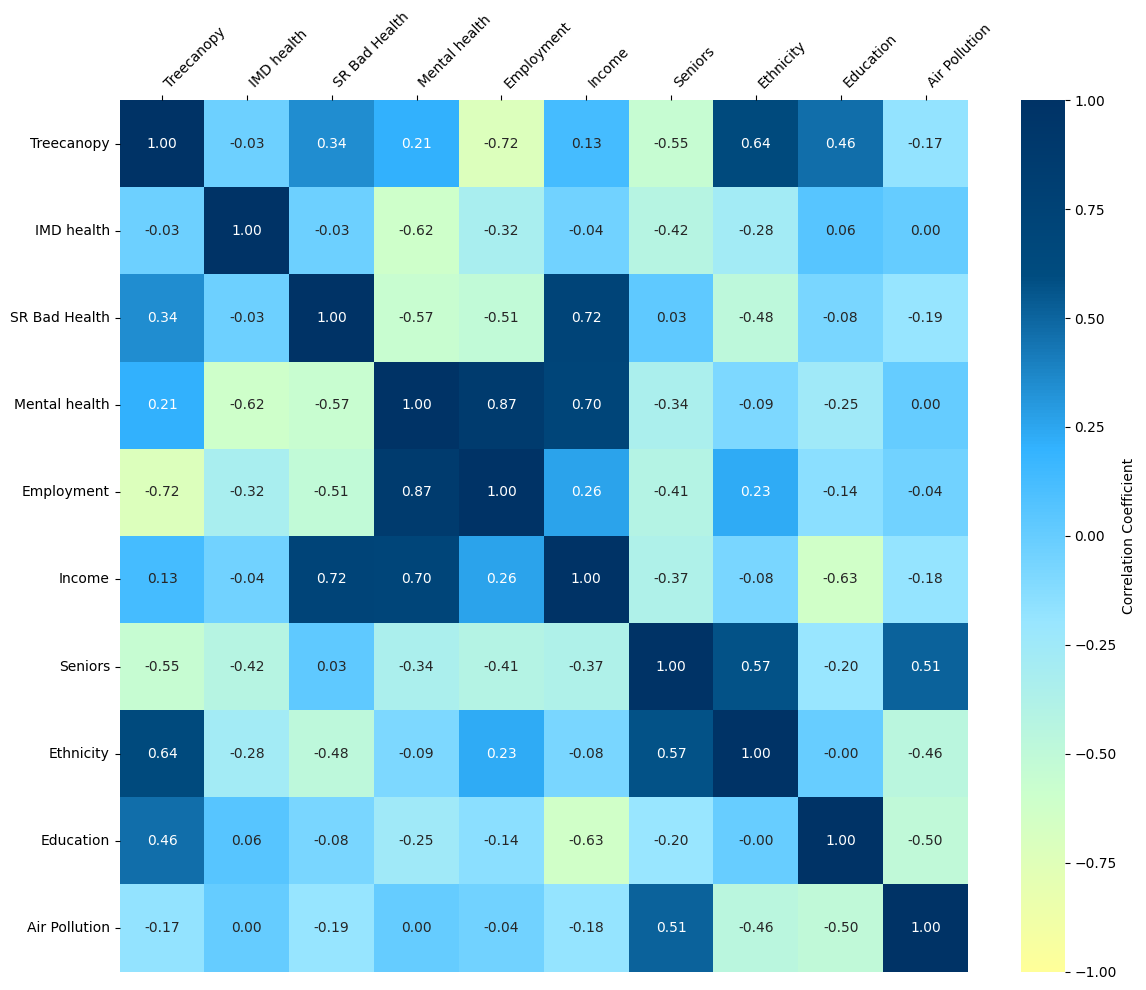

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# Define reversed color direction (Yellow for 1, Blue for -1)
colors = ['#FFFF99',  # Yellow for highest (+1)
          '#CCFFCC',  # Light green
          '#99E6FF',  # Light blue
          '#33B3FF',  # Bright blue
          '#004C80',  # Midnight blue
          '#003366']  # Deep blue for lowest (-1)

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Normalize the data range explicitly from -1 to 1
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Generate a mock correlation matrix
np.random.seed(42)
data = np.random.uniform(low=-1, high=1, size=(10, 10))
data = (data + data.T) / 2  # Symmetric matrix for correlation
np.fill_diagonal(data, 1)  # Perfect self-correlation
labels = ['Treecanopy', 'IMD health', 'SR Bad Health', 'Mental health',
          'Employment', 'Income', 'Seniors', 'Ethnicity',
          'Education', 'Air Pollution']

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data, annot=True, fmt=".2f", cmap=cmap,
            cbar_kws={'label': 'Correlation Coefficient'},
            norm=norm,  # Apply explicit normalizer
            ax=ax)

# Relocate X-axis labels to the top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha='left')  # Rotate x-axis labels

# Set the custom axis labels
ax.set_xticklabels(labels)
ax.set_yticklabels(labels, rotation=0)

plt.tight_layout()
plt.show()